### Density Clustering( DBSCAN Clustering)
* 개념 소개
    * Density-based spetial clustering of applications with noise (DBSCAN)
    * 같은 cluster 에 포함될 데이터는 밀도가 놓게 뭉쳐져 있을 것이다 는 가정하에서 클러스터링을 하는 방식이다.
    * 다시 말하면 어느 점을 기준으로 반경 x내(원의 반지름)에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식이다.

* DBSCAN 밀도 판단 방법
    * DBSCAN이 밀도를 판단하기 위해서는 다음과 같은 Parameter를 확인한다.
        * 최소 거리
            - 이웃(neighborhood)을 정의하기 위한 거리로 원소를 중점으로 하는 원의 반지름
        * 최소 데이터 갯수
            - 밀집지역을 정의하기 위해 필요한 이웃의 갯수
* 정리
    * 점을 중심으로 epsilon 반경 내에 min_samples 이상수의 점이 있으면 그 점을 중심으로 군집이 되고 그 점을 core point라고 한다.
    * core point 가 서로 다른 core point의 군집의 일부가 되면 그 군집을 서로 연결되어 있다고 하고 하나의 군집으로 연결을 한다.
    * 군집에는 속하지만, 스스로 core point가 안되는 점을 border point라고 하고, 주로 클러스터의 외곽을 이루는 점이 된다.
    * 그리고 어느 클러스터에도 속하지 않는 점을 noise point가 된다.

#### iris 데이터 사용

In [25]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

iris = load_iris()
iris_data = iris.data
iris_data_pd = pd.DataFrame(iris_data, columns=iris.feature_names)
iris_data_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


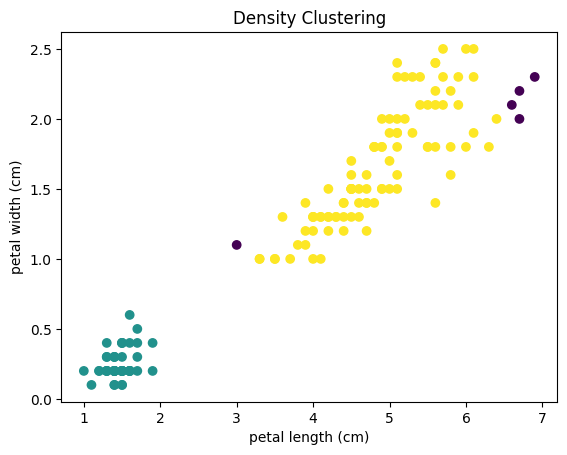

In [26]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=10) #eps = 반경(epsilon) default:0.5
db.fit(iris_data_pd.iloc[:,2:4])
y_pred = db.fit_predict(iris_data_pd.iloc[:,2:4])
plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c=y_pred)
plt.title('Density Clustering')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

In [27]:
# 정상적으로 clustering을 진행하여 분류한 결과를 그래프로 그려보면 일부 이상하게 외로이 분류되어 있는 데이터들을 살펴볼
# 수 있다. DBSCAN의 Attribute 중 'label'를 사용 하여 각각의 데이터들이 어떤 cluster로 분류 되었는지 살표보자. 결과를 보면
# 0번 cluster와 1번 cluster 외의 중간 중간에 -1 cluster가 있다. 'noise'의 경우에는 -1로 반환된다.

db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

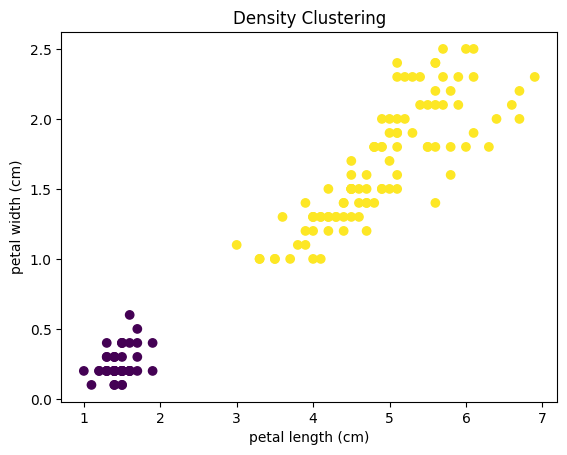

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [28]:
#min_samples 변경후 다시 분류

db.set_params(eps=0.5, min_samples = 5)
y_pred = db.fit_predict(iris_data_pd.iloc[:,2:4])
plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c=y_pred)
plt.title('Density Clustering')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()
print(db.labels_)

In [29]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

#make_blobs : n개의 무작위 데이터 클러스터를 생성한다.
#x: 독립변수 [n_samples, n_features]크기의 배열
#y: 종속변수, [n_samples] 크기의 배열

x,y = make_blobs(n_samples=12, n_features=2, random_state=0)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(x)
print('클러스터 레이블:{0}'.format(clusters))

클러스터 레이블:[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


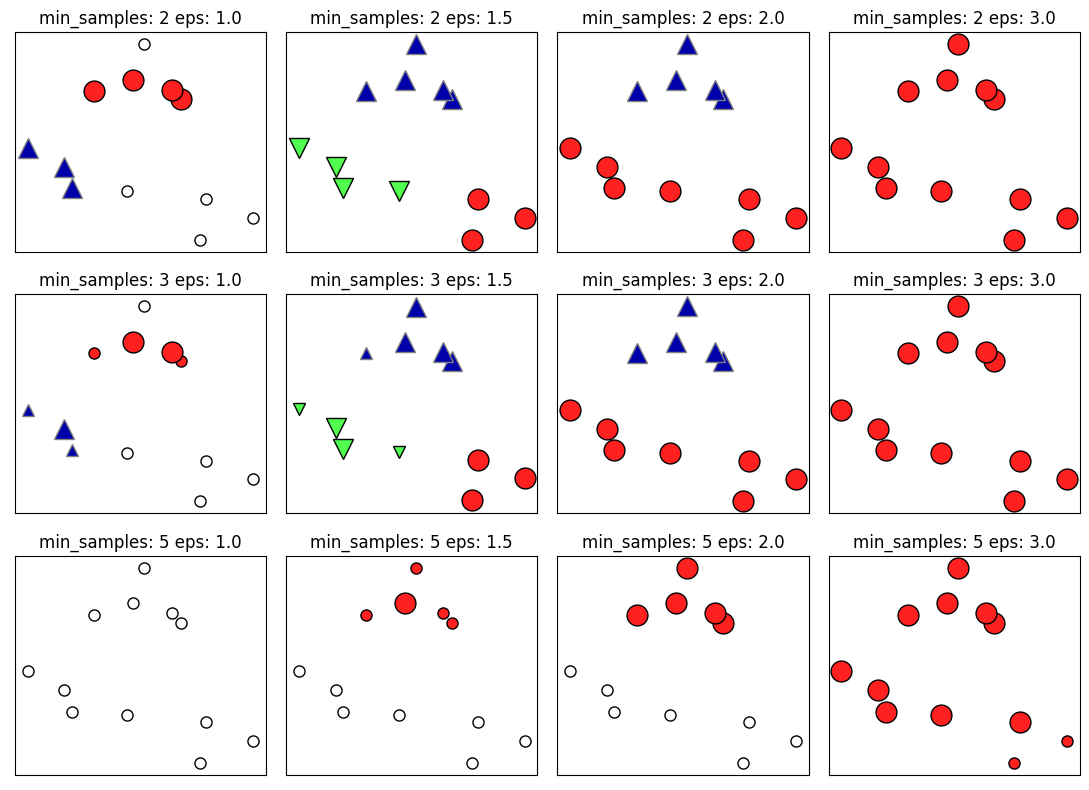

In [30]:
import mglearn

mglearn.plots.plot_dbscan()

In [31]:
dbscan = DBSCAN(eps=0.5, min_samples=2)
clusters = dbscan.fit_predict(x)
print('클러스터 레이블:{0}'.format(clusters))

클러스터 레이블:[-1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1]


In [32]:
dbscan = DBSCAN(eps=1.5, min_samples=2)
clusters = dbscan.fit_predict(x)
print('클러스터 레이블:{0}'.format(clusters))

클러스터 레이블:[0 1 1 1 1 0 2 2 1 2 2 0]


In [33]:
from sklearn.datasets import make_moons #반달 모양의 두개의 클러스터를 가지는 데이터 생성
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False
x,y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler_mms = MinMaxScaler().fit(x)
x_scaled_mms = scaler_mms.transform(x)

dbscan = DBSCAN() #default(eps=0.5, min_samples=5)
clusters_mms = dbscan.fit_predict(x_scaled_mms)
print('np.unique(clusters_mms) 예측한 레이블: {}'.format(np.unique(clusters_mms)))

np.unique(clusters_mms) 예측한 레이블: [0]


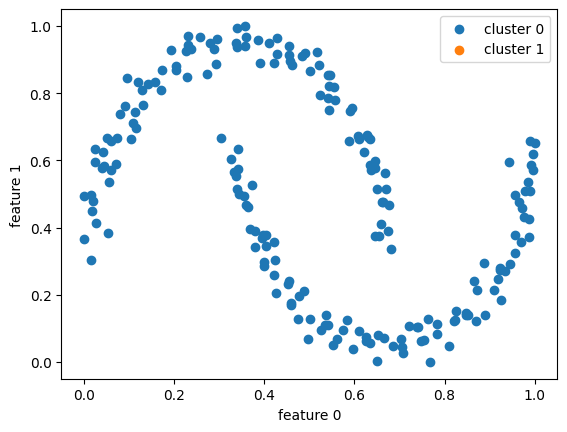

In [34]:
df = np.hstack([x_scaled_mms, clusters_mms.reshape(-1,1)])
df_ft0 = df[df[:,2] == 0, :]
df_ft1 = df[df[:,2] == 1, :]

plt.scatter(df_ft0[:, 0], df_ft0[:, 1], label='cluster 0', cmap='Pairs')
plt.scatter(df_ft1[:, 0], df_ft1[:, 1], label='cluster 1', cmap='Pairs')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend()
plt.show()

In [35]:
from sklearn.datasets import make_moons #반달 모양의 두개의 클러스터를 가지는 데이터 생성
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False
x,y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler_mms = StandardScaler().fit(x)
x_scaled_mms = scaler_mms.transform(x)

dbscan = DBSCAN() #default(eps=0.5, min_samples=5)
clusters_mms = dbscan.fit_predict(x_scaled_mms)
print('np.unique(clusters_mms) 예측한 레이블: {}'.format(np.unique(clusters_mms)))

np.unique(clusters_mms) 예측한 레이블: [0 1]


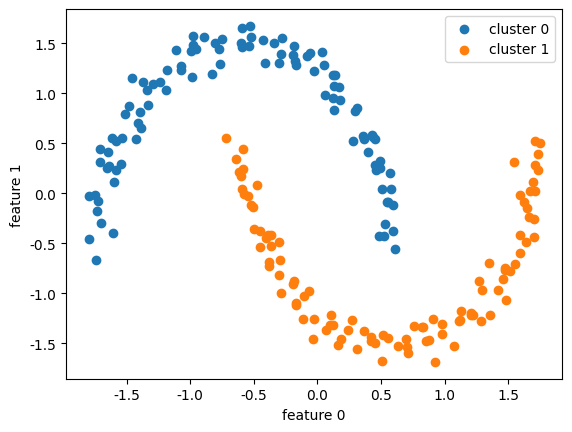

In [36]:
df = np.hstack([x_scaled_mms, clusters_mms.reshape(-1,1)])
df_ft0 = df[df[:,2] == 0, :]
df_ft1 = df[df[:,2] == 1, :]

plt.scatter(df_ft0[:, 0], df_ft0[:, 1], label='cluster 0', cmap='Pairs')
plt.scatter(df_ft1[:, 0], df_ft1[:, 1], label='cluster 1', cmap='Pairs')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend()
plt.show()

#### DBSCAN 으로 얼굴 데이터셋 분석하기

In [37]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import numpy as np

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape #(87,65) 한장의 이미지를 2차원 metrix로 표시함, 단위는 픽셀
mask = np.zeros(people.target.shape, dtype=np.bool) #0을 모두 bool타입으로 바꿔서 false로 나오게함
for target in np.unique(people.target): #people.target => 0~61까지
    mask[np.where(people.target == target)[0][:50]] = 1 #[0][:50] 0번째 데이터의 50개의 열(column)에 1(true)을 대입
x_people = people.data[mask] #true에 해당하는 데이터만 뽑아냄
y_people = people.target[mask] #true에 해당하는 데이터만 뽑아냄

# 0~255 사이의 흑백 이미지를 픽셀 값을 0~1 스케일로 조정
# minmaxscaler 적용과 비슷
x_people = x_people / 255

#차원 축소
pca = PCA(n_components=100, whiten=True, random_state=0) #분산을 이용해서 데이터를 축소하는 알고리즘
pca.fit_transform(x_people)
x_pca = pca.transform(x_people)
people.keys()


c:\Project\AI_Source\AI_01\venv\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [38]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
labels = dbscan.fit_predict(x_pca)
print('고유한 레이블 {}'.format(np.unique(labels))) #-1은 전부 noise 처리됨을 의미

고유한 레이블 [-1]


In [39]:
# min_samples=3 인 경우
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(x_pca)
print('고유한 레이블 {}'.format(np.unique(labels)))

고유한 레이블 [-1]


In [40]:
# min_samples=3, eps=15 인 경우
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(x_pca)
print('고유한 레이블 {}'.format(np.unique(labels)))

고유한 레이블 [-1  0]


In [41]:
print("클러스터 별 포인트 수: {}".format(np.bincount(labels + 1))) #-1로 분류된건 31장, 0으로 분류된건 1945장

클러스터 별 포인트 수: [  31 1945]


클러스터 별 포인트 수: [  31 1945]


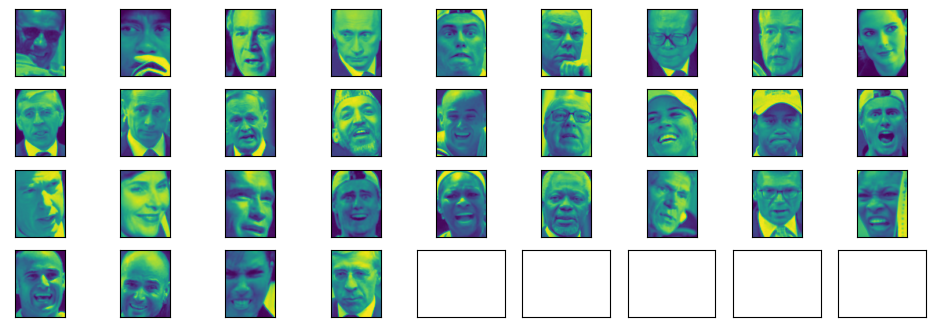

In [42]:
import matplotlib.pyplot as plt
print("클러스터 별 포인트 수: {}".format(np.bincount(labels + 1)))
noise = x_people[labels == -1] #잡음(noise) 이미지 추출
fig, axes = plt.subplots(4,9, subplot_kw={'xticks':(), 'yticks':()}, figsize=(12,4))
for image, ax in zip(noise, axes.ravel()): #잡음(noise) 이미지 출력
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [43]:
for eps in [1,3,5,7,9,11,13]:
    for min_samples in [3,5,7,9]:
        print('\neps={}, min_samples={}'.format(eps, min_samples))
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        lables = dbscan.fit_predict(x_pca)
        print('클러스터 값 {}'.format(np.unique(labels)))
        print('클러스터 수 {}'.format(len(np.unique(labels))))
        print('클러스터 크기 {}'.format(np.bincount(labels+1)))
        


eps=1, min_samples=3
클러스터 값 [-1  0]
클러스터 수 2
클러스터 크기 [  31 1945]

eps=1, min_samples=5
클러스터 값 [-1  0]
클러스터 수 2
클러스터 크기 [  31 1945]

eps=1, min_samples=7
클러스터 값 [-1  0]
클러스터 수 2
클러스터 크기 [  31 1945]

eps=1, min_samples=9
클러스터 값 [-1  0]
클러스터 수 2
클러스터 크기 [  31 1945]

eps=3, min_samples=3
클러스터 값 [-1  0]
클러스터 수 2
클러스터 크기 [  31 1945]

eps=3, min_samples=5
클러스터 값 [-1  0]
클러스터 수 2
클러스터 크기 [  31 1945]

eps=3, min_samples=7
클러스터 값 [-1  0]
클러스터 수 2
클러스터 크기 [  31 1945]

eps=3, min_samples=9
클러스터 값 [-1  0]
클러스터 수 2
클러스터 크기 [  31 1945]

eps=5, min_samples=3
클러스터 값 [-1  0]
클러스터 수 2
클러스터 크기 [  31 1945]

eps=5, min_samples=5
클러스터 값 [-1  0]
클러스터 수 2
클러스터 크기 [  31 1945]

eps=5, min_samples=7
클러스터 값 [-1  0]
클러스터 수 2
클러스터 크기 [  31 1945]

eps=5, min_samples=9
클러스터 값 [-1  0]
클러스터 수 2
클러스터 크기 [  31 1945]

eps=7, min_samples=3
클러스터 값 [-1  0]
클러스터 수 2
클러스터 크기 [  31 1945]

eps=7, min_samples=5
클러스터 값 [-1  0]
클러스터 수 2
클러스터 크기 [  31 1945]

eps=7, min_samples=7
클러스터 값 [-1  0]
클러스터 수 2
클러스터 크기 [  31 1945]

eps=7, mi

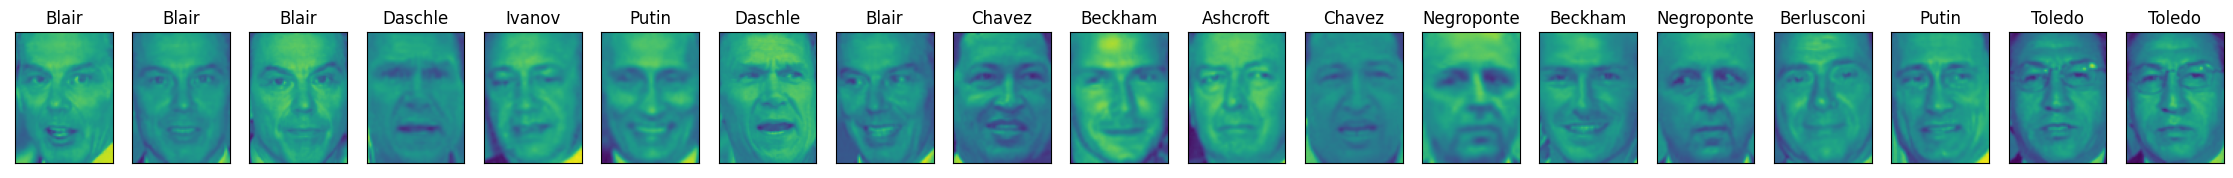

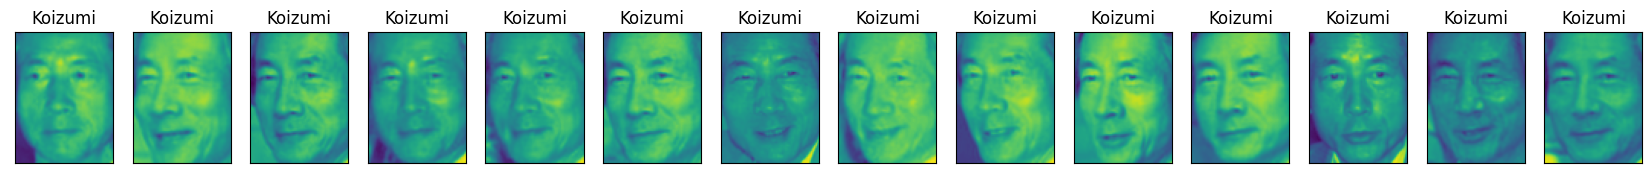

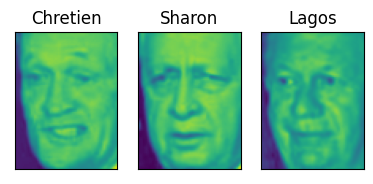

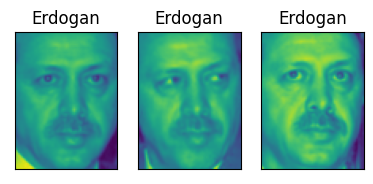

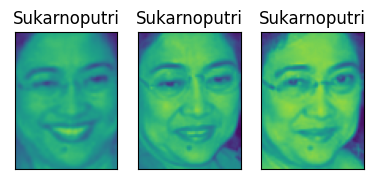

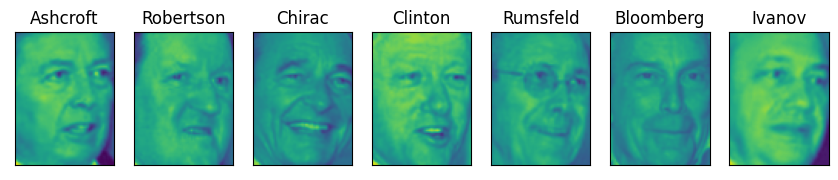

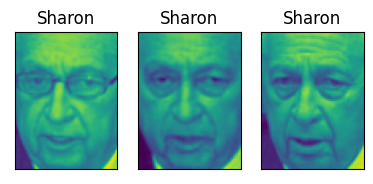

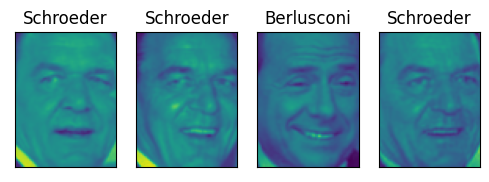

In [44]:
# eps = 7 의 13개의 클러스터에 있는 모든 포인트를 시각화

dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(x_pca)
for cluster in range(max(labels) + 1):
    mask = labels == cluster # labels == cluster에 의해 labels가 -1인 경우는 스킵
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4), subplot_kw={'xticks':(), 'yticks':()})
    for image, label, ax in zip(x_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])